In [1]:
#bizim veri setimizde en iyi model hangi olduğunu bulablimek için her modeli deneyip en sonda 
#karşılaştırdık

# Sınıflandırma Problemleri

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"diabetes2.csv")

In [3]:
df = df.drop(["Unnamed: 0"],axis=1)

In [4]:
df=df.dropna()

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35.0,0,33.6,0.627,50,1
1,1.0,85.0,66,29.0,0,26.6,0.351,31,0
2,8.0,183.0,64,0.0,0,23.3,0.672,32,1
3,1.0,89.0,66,23.0,94,28.1,0.167,21,0
4,0.0,137.0,40,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48.0,180,32.9,0.171,63,0
764,2.0,122.0,70,27.0,0,36.8,0.340,27,0
765,5.0,121.0,72,23.0,112,26.2,0.245,30,0
766,1.0,126.0,60,0.0,0,30.1,0.349,47,1


# Lojistik Regresyon 

## Model 

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35.0,0,33.6,0.627,50,1
1,1.0,85.0,66,29.0,0,26.6,0.351,31,0
2,8.0,183.0,64,0.0,0,23.3,0.672,32,1
3,1.0,89.0,66,23.0,94,28.1,0.167,21,0
4,0.0,137.0,40,35.0,168,43.1,2.288,33,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             767 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [14]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

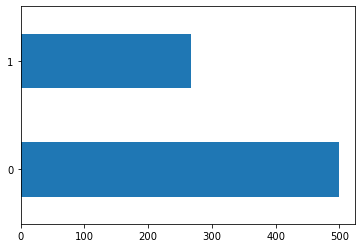

In [15]:
df["Outcome"].value_counts().plot.barh();

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.837240,3.344157,0.000,1.00000,3.0000,6.00000,13.50
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,768.0,70.727865,14.320604,35.000,62.00000,72.0000,80.00000,122.00
SkinThickness,767.0,20.434159,15.708524,0.000,0.00000,23.0000,32.00000,63.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,32.183789,7.240770,13.350,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [87]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [88]:
#statsmodels

In [89]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.585134
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  762
Model:                          Logit   Df Residuals:                      754
Method:                           MLE   Df Model:                            7
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:                 0.09430
Time:                        17:38:08   Log-Likelihood:                -445.87
converged:                       True   LL-Null:                       -492.29
Covariance Type:            nonrobust   LLR p-value:                 3.223e-17
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1328      0.030      4.491      0.000       0.075       0.191
Glucose                      0.0191      0.003      6.290      0.000       0.013       0.025
BloodPressure               -0.0494      0.006     -7.999      0.000      -0.061      -0.037
SkinThickness               -0.0007      0.006     -0.105      0.916      -0.013       0.012
Insulin                      0.0003      0.001      0.356      0.722      -0.001       0.002
BMI                          0.0061      0.012      0.494      0.621      -0.018       0.030
DiabetesPedigreeFunction     0.3727      0.249      1.499      0.134      -0.115       0.860
Age                         -0.0087      0.009     -0.989      0.323      -0.026       0.009
============================================================================================
"""

In [90]:
#scikit-learn

In [91]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [92]:
loj_model.intercept_

array([-5.85921938])

In [93]:
loj_model.coef_

array([[ 0.11953155,  0.03142499, -0.0244457 , -0.00163061, -0.00077667,
         0.06602503,  0.66615332,  0.00661661]])

## Tahmin & Model Tuning

In [94]:
y_pred = loj_model.predict(X)

In [95]:
confusion_matrix(y, y_pred)

array([[442,  55],
       [116, 149]], dtype=int64)

In [96]:
accuracy_score(y, y_pred)

0.7755905511811023

In [97]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       497
           1       0.73      0.56      0.64       265

    accuracy                           0.78       762
   macro avg       0.76      0.73      0.74       762
weighted avg       0.77      0.78      0.77       762



In [98]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [99]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.34104143, 0.65895857],
       [0.92649578, 0.07350422],
       [0.18526865, 0.81473135],
       [0.92832837, 0.07167163],
       [0.13367936, 0.86632064],
       [0.80259747, 0.19740253],
       [0.88166291, 0.11833709],
       [0.33043892, 0.66956108],
       [0.30280907, 0.69719093],
       [0.87306684, 0.12693316]])

In [100]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [101]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [102]:
y_probs[0:10]

array([0.65895857, 0.07350422, 0.81473135, 0.07167163, 0.86632064,
       0.19740253, 0.11833709, 0.66956108, 0.69719093, 0.12693316])

In [103]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [104]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [105]:
confusion_matrix(y, y_pred)

array([[442,  55],
       [116, 149]], dtype=int64)

In [106]:
accuracy_score(y, y_pred)

0.7755905511811023

In [107]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       497
           1       0.73      0.56      0.64       265

    accuracy                           0.78       762
   macro avg       0.76      0.73      0.74       762
weighted avg       0.77      0.78      0.77       762



In [108]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.65895857, 0.07350422, 0.81473135, 0.07167163, 0.86632064])

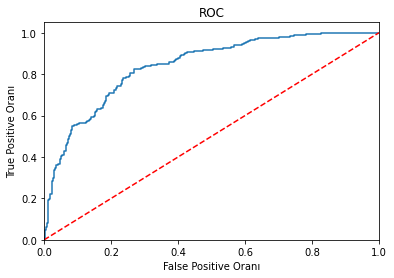

In [109]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [111]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [112]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7685589519650655

In [113]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7733201581027667

# Gaussian Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB

In [115]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [116]:
nb_model.predict(X_test)[0:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [117]:
nb_model.predict_proba(X_test)[0:10]

array([[8.52833563e-01, 1.47166437e-01],
       [9.65702786e-01, 3.42972142e-02],
       [1.13442497e-01, 8.86557503e-01],
       [6.52810382e-01, 3.47189618e-01],
       [9.45153246e-01, 5.48467542e-02],
       [5.55117791e-04, 9.99444882e-01],
       [9.68891124e-01, 3.11088762e-02],
       [9.85358155e-01, 1.46418455e-02],
       [8.46374648e-01, 1.53625352e-01],
       [4.19064627e-01, 5.80935373e-01]])

In [118]:
y_pred = nb_model.predict(X_test)

In [119]:
accuracy_score(y_test, y_pred)

0.7729257641921398

In [120]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.7733201581027668

In [121]:
nb_model.score(X_test,y_test)

0.7729257641921398

# KNN

## Model & Tahmin

In [64]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [65]:
y_pred = knn_model.predict(X_test)

In [66]:
accuracy_score(y_test, y_pred)

0.6943231441048034

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       155
           1       0.52      0.59      0.56        74

    accuracy                           0.69       229
   macro avg       0.66      0.67      0.66       229
weighted avg       0.71      0.69      0.70       229



In [68]:
knn_model.score(X_test,y_test)

0.6943231441048034

## Model Tuning

In [69]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [70]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [71]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.7411250873515025
En iyi parametreler: {'n_neighbors': 42}


In [122]:
knn = KNeighborsClassifier(42)
knn_tuned = knn.fit(X_train, y_train)

In [123]:
knn_tuned.score(X_test, y_test)

0.74235807860262

In [124]:
y_pred = knn_tuned.predict(X_test)

In [125]:
accuracy_score(y_test, y_pred)

0.74235807860262

# SVC

## Model & Tahmin

In [76]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [77]:
svm_model

SVC(kernel='linear')

In [78]:
y_pred = svm_model.predict(X_test)

In [79]:
accuracy_score(y_test, y_pred)

0.7685589519650655

## Model Tuning

In [80]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [81]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 2}


In [126]:
svc_tuned = SVC(kernel = "linear", C = 2).fit(X_train, y_train)

In [127]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7729257641921398

# RBF SVC

## Model & Tahmin

In [84]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [85]:
svc_model

SVC()

In [86]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7685589519650655

## Model Tuning

In [87]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [92]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [93]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 5, 'gamma': 0.0001}


In [128]:
svc_tuned = SVC(C = 5, gamma = 0.0001).fit(X_train, y_train)

In [129]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7554585152838428

# Yapay Sinir Ağları

## Model & Tahmin

In [130]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [131]:
from sklearn.preprocessing import StandardScaler  

In [132]:
scaler = StandardScaler()

In [133]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
X_test_scaled[0:5]

array([[ 0.03244072, -0.40010541, -0.51531501,  1.48125462,  0.16467199,
         0.32571888,  1.21534844, -0.64444212],
       [ 0.03244072, -0.85815796, -0.0739713 ,  0.72483909, -0.69556432,
        -0.04595938,  0.37070534, -0.8130664 ],
       [ 0.03244072, -0.33466933,  0.07314327,  1.67035851,  1.10311161,
         0.64233369,  2.61347781,  1.88492203],
       [-0.56379741, -0.07292501, -2.64847625, -1.292269  , -0.69556432,
        -1.76669206,  1.00490835,  3.23391624],
       [ 0.62867886, -0.82543992, -2.64847625, -1.292269  , -0.69556432,
        -1.20229174, -0.84581134, -0.47581785]])

In [135]:
from sklearn.neural_network import MLPClassifier

In [136]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [137]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7510917030567685

## Model Tuning

In [115]:
mlpc

MLPClassifier()

In [116]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\donba\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default='a

In [117]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [118]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [119]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [138]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.01, 
                           hidden_layer_sizes = (100, 100),
                          solver = "sgd")

In [139]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 100), solver='sgd')

In [140]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7729257641921398

# Random Forests

In [141]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [144]:
rf_model

RandomForestClassifier()

In [145]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7816593886462883

## Model Tuning

In [19]:
rf_model

RandomForestClassifier()

In [20]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\donba\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" fo

In [21]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [22]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [23]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [24]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 10, 'n_estimators': 10}


In [ ]:
#final

In [146]:
rf_tuned = RandomForestClassifier(max_depth = 8, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 10)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=8, min_samples_split=10,
                       n_estimators=10)

In [147]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7685589519650655

In [148]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

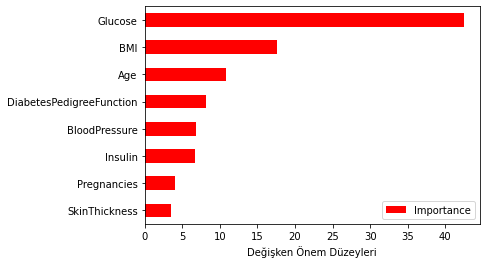

In [149]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [29]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [150]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [151]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.74235807860262

## Model Tuning

In [33]:
gbm_model

GradientBoostingClassifier()

In [34]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        c:\users\donba\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, default='deviance'
    The loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    with probabilistic outputs. For loss 'exponential' gradient
    boosting recovers the AdaBoost algorithm.

learning_rate : float, default=0.1
    Learning r

In [35]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [36]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [37]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [38]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [152]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 5,
                                min_samples_split = 10,
                                n_estimators = 100)

In [153]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [154]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.759825327510917

# XGBoost

In [42]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [44]:
from xgboost import XGBClassifier

In [155]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[17:41:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [156]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [157]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.74235807860262

## Model Tuning

In [48]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_byno <...> _weight=1, subsample=1,
           tree_method='exact', validate_parameters=1, verbosity=None)
File:        c:\users\donba\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.
    use_label_encoder : bool
        (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new
        code, we recommend that you set this parameter to False.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective

In [50]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [51]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [52]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[16:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_job...,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [53]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [158]:
xgb = XGBClassifier(learning_rate = 0.05, 
                    max_depth = 5,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 1.0)

In [159]:
xgb_tuned =  xgb.fit(X_train,y_train)

[17:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [160]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7729257641921398

# LightGBM

In [57]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [58]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [59]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [60]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7554585152838428

In [ ]:
## Model Tuning

In [61]:
lgbm_model

LGBMClassifier()

In [ ]:
?lgbm_model

In [62]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [63]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [64]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [66]:
lgbm_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 5,
 'min_child_samples': 5,
 'n_estimators': 100,
 'subsample': 0.6}

In [70]:
lgbm = LGBMClassifier(learning_rate = 0.02, 
                       max_depth = 5,
                       subsample = 0.6,
                       n_estimators = 100,
                       min_child_samples = 5)

In [71]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [72]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7685589519650655

# CatBoost

## Model & Tahmin

In [73]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [74]:
#!pip install catboost
from catboost import CatBoostClassifier

In [75]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.007875
0:	learn: 0.6884635	total: 124ms	remaining: 2m 3s
1:	learn: 0.6839412	total: 129ms	remaining: 1m 4s
2:	learn: 0.6798718	total: 133ms	remaining: 44.1s
3:	learn: 0.6760508	total: 137ms	remaining: 34.1s
4:	learn: 0.6728764	total: 140ms	remaining: 27.8s
5:	learn: 0.6688114	total: 143ms	remaining: 23.7s
6:	learn: 0.6652028	total: 146ms	remaining: 20.7s
7:	learn: 0.6617717	total: 150ms	remaining: 18.6s
8:	learn: 0.6589662	total: 153ms	remaining: 16.9s
9:	learn: 0.6561000	total: 157ms	remaining: 15.5s
10:	learn: 0.6520011	total: 160ms	remaining: 14.4s
11:	learn: 0.6491374	total: 163ms	remaining: 13.4s
12:	learn: 0.6458028	total: 166ms	remaining: 12.6s
13:	learn: 0.6424921	total: 170ms	remaining: 12s
14:	learn: 0.6386606	total: 174ms	remaining: 11.4s
15:	learn: 0.6356130	total: 177ms	remaining: 10.9s
16:	learn: 0.6319201	total: 180ms	remaining: 10.4s
17:	learn: 0.6287306	total: 184ms	remaining: 10s
18:	learn: 0.6260176	total: 187ms	remaining: 9.63s
19:	learn: 0.62

In [76]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.777292576419214

## Model Tuning

In [77]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [78]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6556552	total: 3.76ms	remaining: 1.88s
1:	learn: 0.6292138	total: 6.33ms	remaining: 1.58s
2:	learn: 0.6109906	total: 9.15ms	remaining: 1.52s
3:	learn: 0.5880711	total: 11.5ms	remaining: 1.43s
4:	learn: 0.5663977	total: 15.2ms	remaining: 1.5s
5:	learn: 0.5459126	total: 18.6ms	remaining: 1.53s
6:	learn: 0.5340227	total: 21.4ms	remaining: 1.51s
7:	learn: 0.5227953	total: 24.6ms	remaining: 1.51s
8:	learn: 0.5108263	total: 28ms	remaining: 1.52s
9:	learn: 0.5025857	total: 30.1ms	remaining: 1.47s
10:	learn: 0.4955538	total: 32.6ms	remaining: 1.45s
11:	learn: 0.4856709	total: 34.8ms	remaining: 1.42s
12:	learn: 0.4799371	total: 36.8ms	remaining: 1.38s
13:	learn: 0.4740515	total: 39ms	remaining: 1.35s
14:	learn: 0.4682936	total: 41.6ms	remaining: 1.34s
15:	learn: 0.4646692	total: 43.7ms	remaining: 1.32s
16:	learn: 0.4584397	total: 45.7ms	remaining: 1.3s
17:	learn: 0.4550613	total: 48.5ms	remaining: 1.3s
18:	learn: 0.4527892

{'depth': 3, 'iterations': 500, 'learning_rate': 0.1}

In [79]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.1}

In [172]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6645984	total: 15.2ms	remaining: 3.03s
1:	learn: 0.6434910	total: 16.7ms	remaining: 1.65s
2:	learn: 0.6242738	total: 18ms	remaining: 1.18s
3:	learn: 0.6105454	total: 19ms	remaining: 933ms
4:	learn: 0.5921193	total: 20.4ms	remaining: 794ms
5:	learn: 0.5801625	total: 21.5ms	remaining: 695ms
6:	learn: 0.5628821	total: 22.6ms	remaining: 623ms
7:	learn: 0.5517693	total: 23.7ms	remaining: 568ms
8:	learn: 0.5361405	total: 24.9ms	remaining: 528ms
9:	learn: 0.5276726	total: 26.2ms	remaining: 497ms
10:	learn: 0.5228155	total: 27.5ms	remaining: 473ms
11:	learn: 0.5140078	total: 28.9ms	remaining: 453ms
12:	learn: 0.5050585	total: 30.2ms	remaining: 435ms
13:	learn: 0.4975609	total: 31.4ms	remaining: 418ms
14:	learn: 0.4889197	total: 32.7ms	remaining: 403ms
15:	learn: 0.4841886	total: 34ms	remaining: 391ms
16:	learn: 0.4798831	total: 35.4ms	remaining: 381ms
17:	learn: 0.4710092	total: 36.5ms	remaining: 369ms
18:	learn: 0.4664067	total: 37.8ms	remaining: 360ms
19:	learn: 0.4614224	total: 

In [173]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7816593886462883

# Tüm Modellerin Karşılaştırılması

In [161]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 74.2358%
----------------------------
LogisticRegression:
Accuracy: 76.8559%
----------------------------
SVC:
Accuracy: 75.5459%
----------------------------
GaussianNB:
Accuracy: 77.2926%
----------------------------
MLPClassifier:
Accuracy: 32.3144%
----------------------------
RandomForestClassifier:
Accuracy: 76.8559%
----------------------------
GradientBoostingClassifier:
Accuracy: 75.9825%
----------------------------
CatBoostClassifier:
Accuracy: 78.1659%
----------------------------
LGBMClassifier:
Accuracy: 76.8559%
----------------------------
XGBClassifier:
Accuracy: 77.2926%


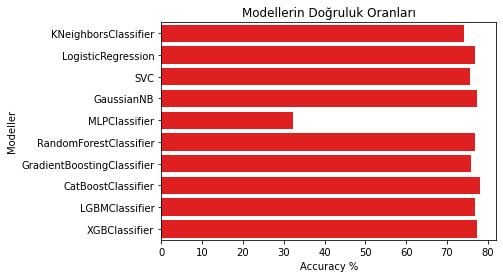

In [162]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    

In [2]:
#en iyi model CatBoost oldu ama arayüz oluşturma kısmında sorun çıkardığı için
#ikinci en iyi model olan XGBC yi kullanmaya karar verdim